# Analysis

In [29]:
import sys, os, ipynbname
NOTEBOOK_NAME = f"{ipynbname.name()}.ipynb"
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(NOTEBOOK_NAME), os.path.pardir)))

In [30]:
# Main functions
from src.Constants import *
from src.Utils import *

# Model simulation
from src.EquityModel import *
from src.BlackScholes import *
from src.Heston import *

from src.RatesModel import *
from src.Vasicek import *
from src.CIR import *
from src.HullWhite import *

# Pricing
from src.Pricer import *
from src.EuropeanPricer import *
from src.AsianPricer import *

## BS + Vasicek :

In [31]:
# Default Vasicek model
model = Vasicek(0.01875, 0.20, 0.01, 0.012) # r0, kappa, theta, sigma

In [32]:
# Casting the results into a pandas DataFrame
df = Utils.cast_df(model.simulate_euler(T=3, N = 1000))

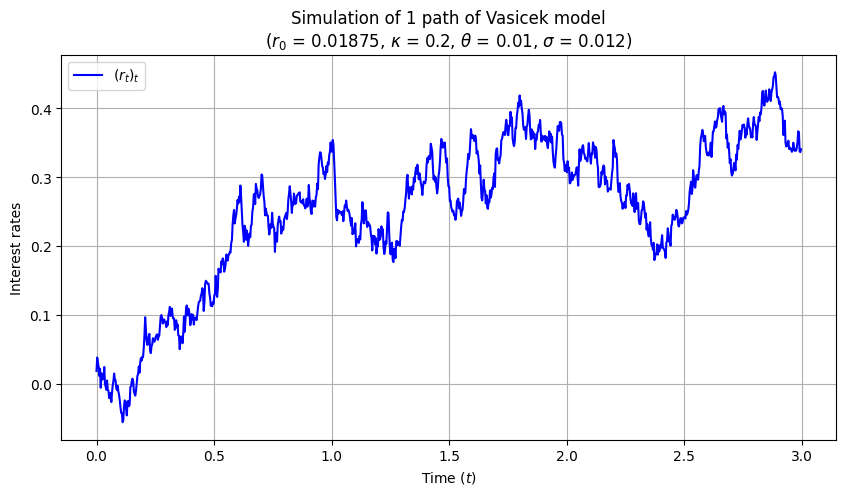

In [5]:
# Simulation of a trajectory
_ = df.plot(color="blue", x="t", y ="r", label="$(r_t)_t$")
_ = plt.grid()
_ = plt.xlabel("Time ($t$)")
_ = plt.ylabel("Interest rates")
_ = plt.title(f"Simulation of 1 path of Vasicek model\n{model.get_parameter_string()}")
_ = plt.legend()

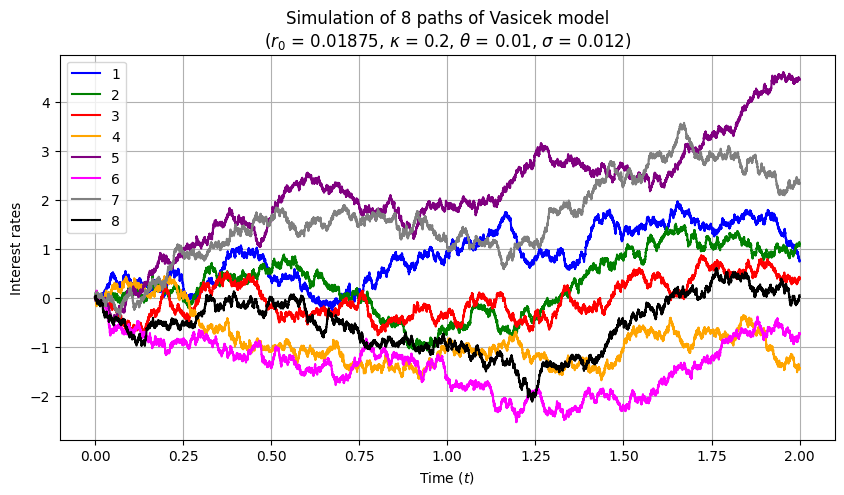

In [6]:
# Simulation of several trajectories
NB_TRAJECTORIES = 8
_ = Utils.cast_df(model.simulate_paths(NB_TRAJECTORIES, T = 2)).T.plot(x = 0, y = list(range(1, NB_TRAJECTORIES + 1)))
_ = plt.grid()
_ = plt.xlabel("Time ($t$)")
_ = plt.ylabel("Interest rates")
_ = plt.title(f"Simulation of {NB_TRAJECTORIES} paths of Vasicek model\n{model.get_parameter_string()}")
_ = plt.legend()

In [7]:
S0 = 1
sigma = 0.014
rho = 0.5
r =  Vasicek(0.01875, 0.20, 0.01, 0.014)
model = BlackScholes(S0, r, sigma, rho)

In [8]:
d = model.simulate_euler(T=4.2, getRates=True)
df = pd.DataFrame(d)
df.head()

,t,S,r
0,0.00000,1.000000,0.018750
1,0.00021,1.000079,0.018778
2,0.00042,1.000125,0.018866
3,0.00063,1.000046,0.018764
4,0.00084,1.000026,0.018757


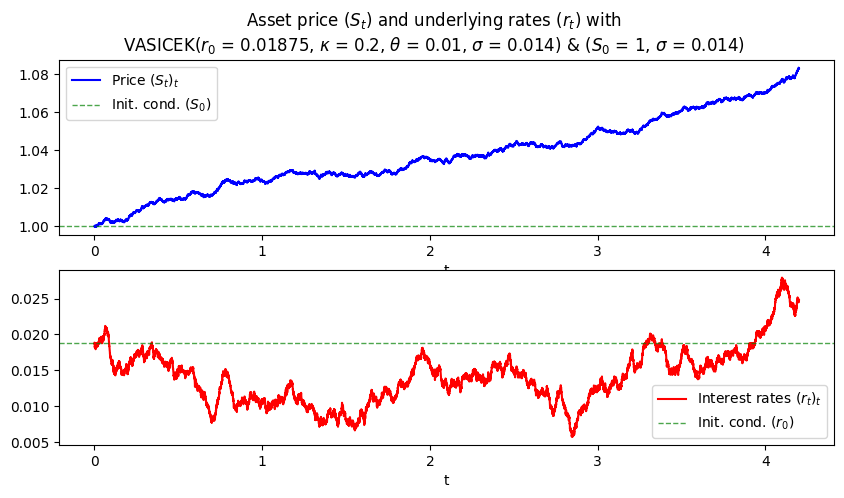

In [9]:
# Plotting the asset price and the interest rates evolution over time 
_, axes = plt.subplots(nrows=2, ncols=1)
_ = df.plot(x = "t", y = "S", color="blue", label="Price $(S_t)_t$", ax=axes[0])
_ = axes[0].axhline(y = model.S0, color="green", ls="--", lw=1, alpha=0.7, label="Init. cond. $(S_0)$")
_ = df.plot(x = "t", y = "r", color="red", label="Interest rates $(r_t)_t$", ax=axes[1])
_ = axes[1].axhline(y = r.r0, color="green", ls="--", lw=1, alpha=0.7, label="Init. cond. $(r_0)$")
axes[0].legend()
axes[1].legend()
_ = plt.suptitle(f"Asset price $(S_t)$ and underlying rates $(r_t)$ with\n{r.MODEL_NAME}{r.get_parameter_string()} & {model.get_parameter_string()}")

###  Effect of kappa

In [33]:
kappa= [ 0.1,0.3,0.6,0.9 ]
S0 = 1
sigma = 0.03
rho = 0.5

In [34]:
list_data_frame=[]

for kap in kappa :
    r = Vasicek(0.01875, kap, 0.01, 0.03) # r0, kappa, theta, sigma
    model = BlackScholes(S0, r, sigma, rho)
    d = model.simulate_euler(T=20, getRates=True)
    df = pd.DataFrame(d)
    list_data_frame.append(df)
    
    

    

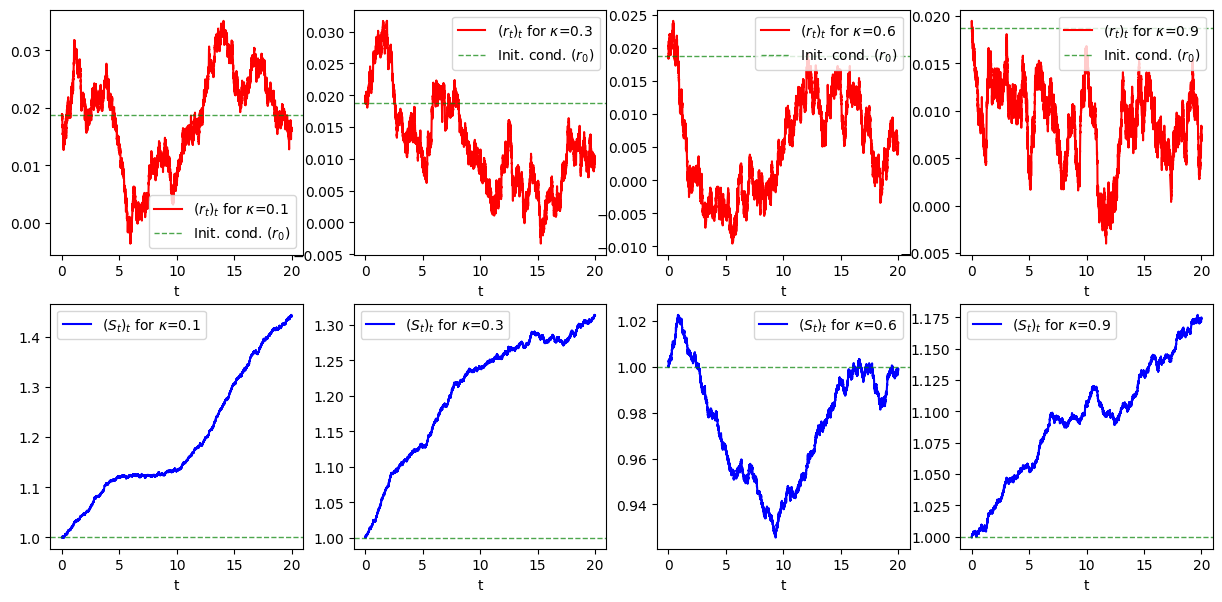

In [35]:
_, axes = plt.subplots(nrows=2, ncols=4)



for i in range(len(list_data_frame)):
     _ = list_data_frame[i].plot(x = "t", y = "r", color="red",figsize=(15, 7), label="$(r_t)_t$ for $\kappa$="+ str(kappa[i]) , ax=axes[0][i])
     _ = axes[0][i].axhline(y = r.r0, color="green", ls="--", lw=1, alpha=0.7, label="Init. cond. $(r_0)$")
     axes[0][i].legend()
     _ = list_data_frame[i].plot(x = "t", y = "S", color="blue", label="$(S_t)_t$ for $\kappa$="+ str(kappa[i]), ax=axes[1][i])
     _ = axes[1][i].axhline(y = model.S0, color="green", ls="--", lw=1, alpha=0.7, label="Init. cond. $(S_0)$")
      


    
    

A higher kappa value implies a faster mean reversion, meaning that the interest rate will adjust more quickly toward its long-term average. \newline
 Increasing kappa would lead to a more volatile interest rate process, with interest rates exhibiting sharper and quicker fluctuations around the mean.




## Effect of theta

In [13]:
theta= [ 0.01,0.02,0.04,0.1 ]
S0 = 1
sigma = 0.012
rho = 0.5

In [14]:
list_data_frame=[]

for thet in theta :
    r = Vasicek(0.01875, 0.2, thet, 0.012) # r0, kappa, theta, sigma
    model = BlackScholes(S0, r, sigma, rho)
    d = model.simulate_euler(T=20, getRates=True)
    df = pd.DataFrame(d)
    list_data_frame.append(df)

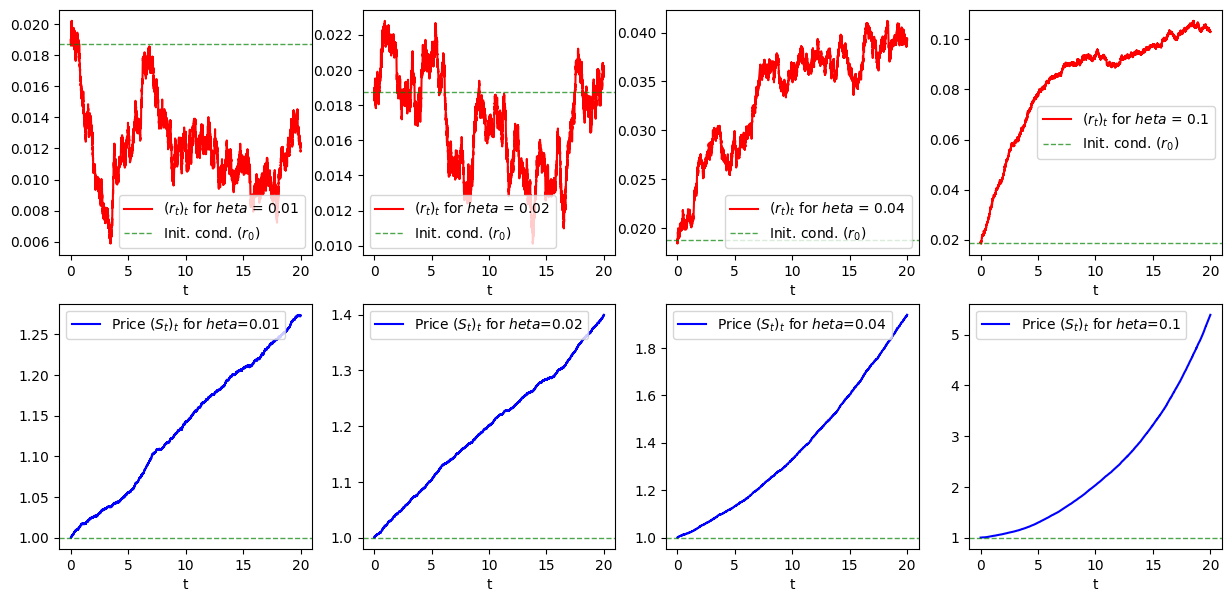

In [15]:
_, axes = plt.subplots(nrows=2, ncols=4)



for i in range(len(list_data_frame)):
     _ = list_data_frame[i].plot(x = "t", y = "r", color="red",figsize=(15, 7), label="$(r_t)_t$ for $\theta$ = "+ str(theta[i]) , ax=axes[0][i])
     _ = axes[0][i].axhline(y = r.r0, color="green", ls="--", lw=1, alpha=0.7, label="Init. cond. $(r_0)$")
     axes[0][i].legend()
     _ = list_data_frame[i].plot(x = "t", y = "S", color="blue", label="Price $(S_t)_t$ for $\theta$="+ str(theta[i]), ax=axes[1][i])
     _ = axes[1][i].axhline(y = model.S0, color="green", ls="--", lw=1, alpha=0.7, label="Init. cond. $(S_0)$")

When theta is increased, it raises the long-term mean of the interest rate process. This means that the interest rate will have a higher average value over time, and the model will reflect an upward shift in the interest rate dynamics.

We alsoremark  that if theta increases, the price plot becomes more and more convex .  so, the asset's value is appreciating at an increasing rate. 

## Effect of sigma

In [36]:
S0 = 1
sigma = [0.02,0.04,0.06,0.08]
rho = 0.5

In [38]:
list_data_frame=[]

for sig in sigma :
    r = Vasicek(0.01875, 0.2, 0.01, sig) # r0, kappa, theta, sigma
    model = BlackScholes(S0, r, sig, rho)
    d = model.simulate_euler(T=20, getRates=True)
    df = pd.DataFrame(d)
    list_data_frame.append(df)

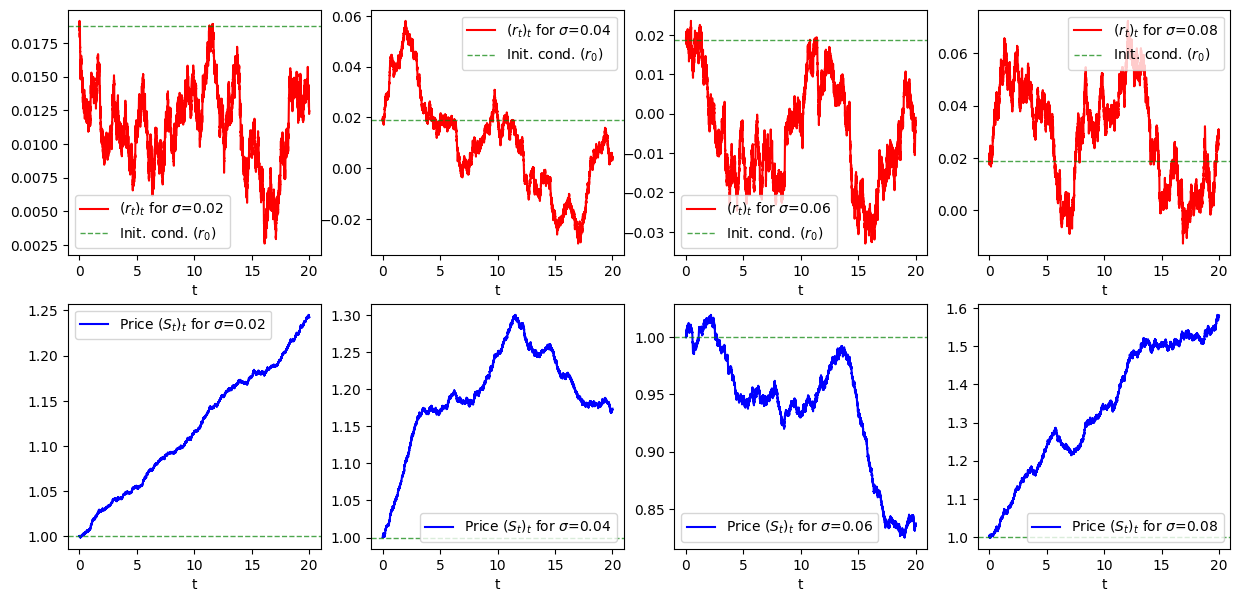

In [39]:
_, axes = plt.subplots(nrows=2, ncols=4)



for i in range(len(list_data_frame)):
     _ = list_data_frame[i].plot(x = "t", y = "r", color="red",figsize=(15, 7), label="$(r_t)_t$ for $\sigma$="+ str(sigma[i]) , ax=axes[0][i])
     _ = axes[0][i].axhline(y = r.r0, color="green", ls="--", lw=1, alpha=0.7, label="Init. cond. $(r_0)$")
     axes[0][i].legend()
     _ = list_data_frame[i].plot(x = "t", y = "S", color="blue", label="Price $(S_t)_t$ for $\sigma$="+ str(sigma[i]), ax=axes[1][i])
     _ = axes[1][i].axhline(y = model.S0, color="green", ls="--", lw=1, alpha=0.7, label="Init. cond. $(S_0)$")

Increasing sigma leads to higher volatility in the interest rate process. The interest rate will experience more significant and more frequent fluctuations around its mean.

## Effect of T

In [40]:
list_data_frame=[]

time=[4,10,20,40]


for t in time :
    r = Vasicek(0.01875, 0.2, 0.01, 0.07) # r0, kappa, theta, sigma
    model = BlackScholes(S0, r, 0.07, rho)
    d = model.simulate_euler(T=t, getRates=True)
    df = pd.DataFrame(d)
    list_data_frame.append(df)

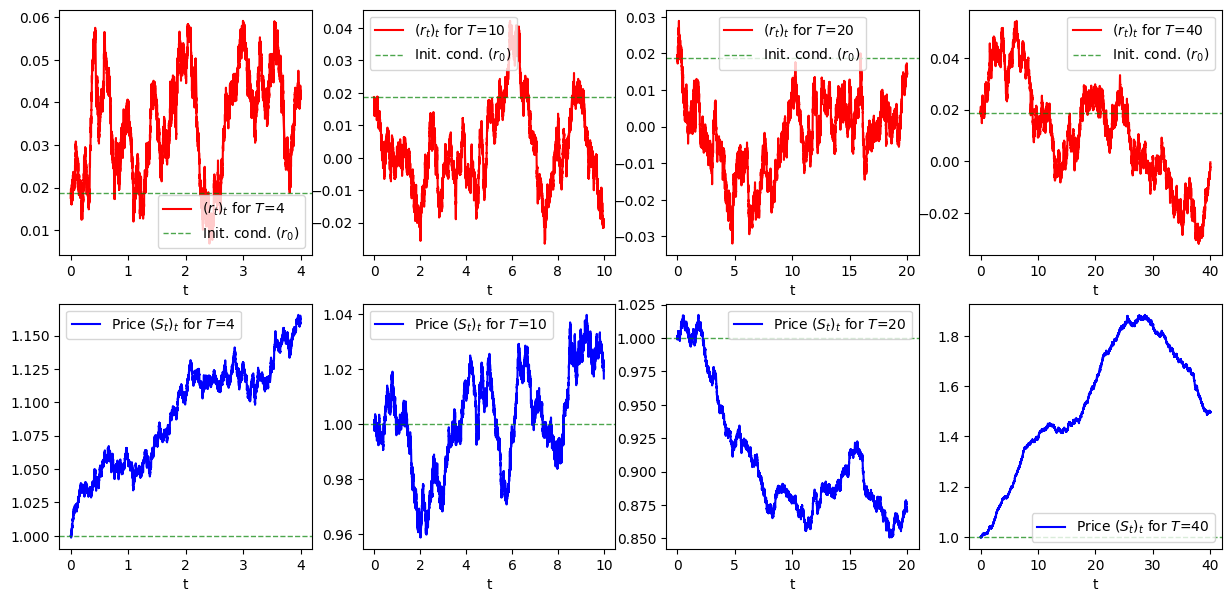

In [41]:
_, axes = plt.subplots(nrows=2, ncols=4)



for i in range(len(list_data_frame)):
     _ = list_data_frame[i].plot(x = "t", y = "r", color="red",figsize=(15, 7), label="$(r_t)_t$ for $T$="+ str(time[i]) , ax=axes[0][i])
     _ = axes[0][i].axhline(y = r.r0, color="green", ls="--", lw=1, alpha=0.7, label="Init. cond. $(r_0)$")
     axes[0][i].legend()
     _ = list_data_frame[i].plot(x = "t", y = "S", color="blue", label="Price $(S_t)_t$ for $T$="+ str(time[i]), ax=axes[1][i])
     _ = axes[1][i].axhline(y = model.S0, color="green", ls="--", lw=1, alpha=0.7, label="Init. cond. $(S_0)$")

A longer time horizon allows for a greater number of interest rate movements and more time for the mean reversion process to play out. 

## Effect of N 

In [42]:
list_data_frame=[]

num_sim=[100,500,1000,10000]


for n in num_sim :
    r = Vasicek(0.01875, 0.2, 0.01, 0.07) # r0, kappa, theta, sigma
    model = BlackScholes(S0, r, 0.07, rho)
    d = model.simulate_euler(T=20,N=n,getRates=True)
    df = pd.DataFrame(d)
    list_data_frame.append(df)

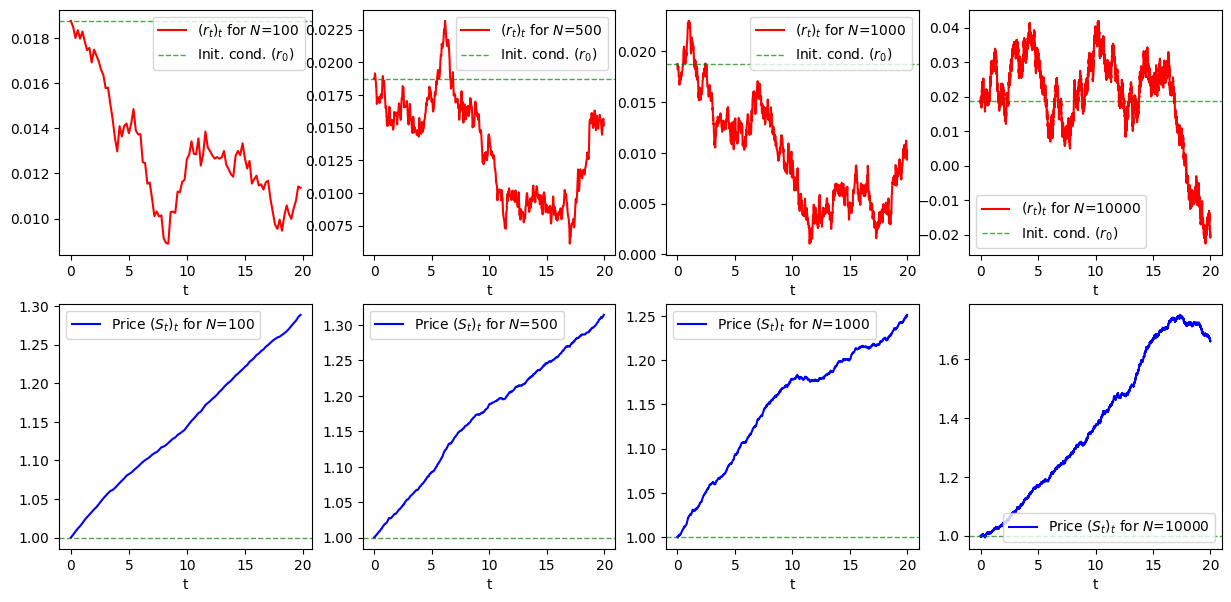

In [43]:
_, axes = plt.subplots(nrows=2, ncols=4)



for i in range(len(list_data_frame)):
     _ = list_data_frame[i].plot(x = "t", y = "r", color="red",figsize=(15, 7), label="$(r_t)_t$ for $N$="+ str(num_sim[i]) , ax=axes[0][i])
     _ = axes[0][i].axhline(y = r.r0, color="green", ls="--", lw=1, alpha=0.7, label="Init. cond. $(r_0)$")
     axes[0][i].legend()
     _ = list_data_frame[i].plot(x = "t", y = "S", color="blue", label="Price $(S_t)_t$ for $N$="+ str(num_sim[i]), ax=axes[1][i])
     _ = axes[1][i].axhline(y = model.S0, color="green", ls="--", lw=1, alpha=0.7, label="Init. cond. $(S_0)$")

Increasing N result in a finer division of the time horizon, allowing for more accurate modeling of interest rate dynamics.

## Simulation of the joint distribution $\Big(\int_0^T r_u \mathrm{d}u, S_T\Big) $

In [23]:
from scipy.integrate import trapz

In [24]:
r =  Vasicek(0.01875, 0.20, 0.01, 0.07)
sigma=0.07
model = BlackScholes(S0, r, sigma, rho)

d = model.simulate_euler(T=20, getRates=True)
df = pd.DataFrame(d)


In [25]:
 d['r'].cumsum()

array([1.87500000e-02, 3.74036544e-02, 5.54374700e-02, ...,
       3.75711981e+02, 3.75701061e+02, 3.75691581e+02])

In [26]:
d['integrale_r']= (d['r'].cumsum()) * (20/10000)

In [27]:
X= d['S']
Y= d['integrale_r']

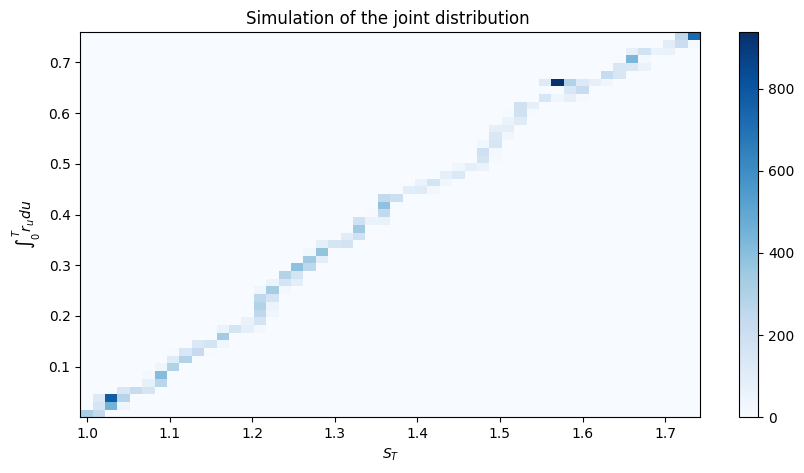

In [28]:
# Calculate the joint distribution by stacking X and Y as columns in a 2D array
joint_dist = np.column_stack((X, Y))

# Plot the joint distribution
plt.figure()
plt.hist2d(X, Y, bins=50, cmap='Blues')
plt.colorbar()
plt.xlabel('$S_T$')
plt.ylabel('$\int_0^T r_u du $')
plt.title( "Simulation of the joint distribution " )
plt.show()

The joint distribution of $S_T$ and $\int_0^T r_u , du$ has relatively low density throughout most of the plot, with regions of higher density in the upper right and lower left. Additionally, there is a positive correlation between the two variables, indicating that they tend to move together in the same direction
